Simulation Mean: 0.31325 (Theory: 0.31333)
Simulation Var:  0.01848  (Theory: 0.01849)


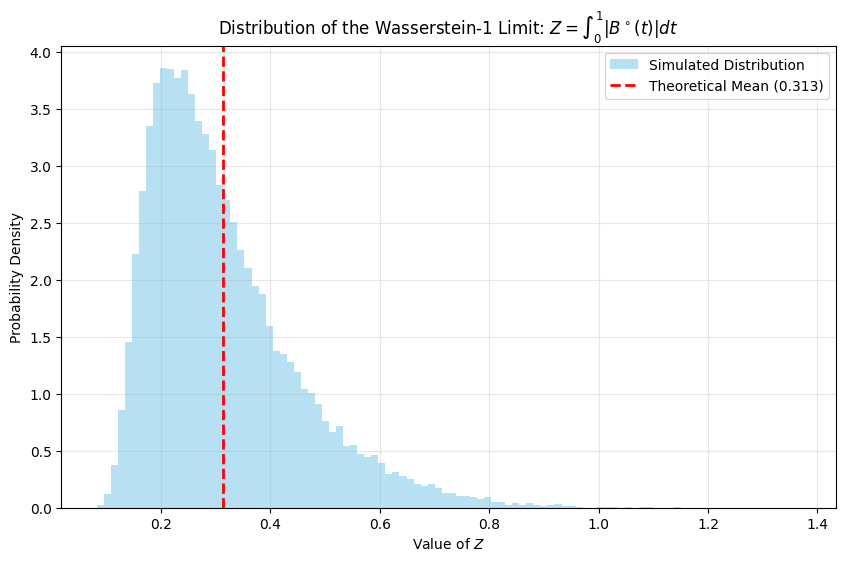

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def simulate_brownian_bridge_area(n_samples=10000, n_steps=1000):
    """
    Simulates the distribution of the L1-norm (area under absolute curve)
    of a Brownian Bridge.
    
    Args:
        n_samples (int): Number of trajectories to simulate.
        n_steps (int): Number of time steps per trajectory (discretization).
        
    Returns:
        areas (np.array): Array of calculated areas (W-1 distances).
    """
    # 1. Generate standard Brownian Motion: W(t)
    dt = 1.0 / n_steps
    
    # Generate random increments: dW ~ N(0, dt)
    # Shape: (n_samples, n_steps)
    dW = np.sqrt(dt) * np.random.randn(n_samples, n_steps)
    
    # Cumulative sum to get Brownian Motion path W(t)
    # We prepend a column of zeros so paths start at 0
    W = np.cumsum(dW, axis=1)
    W = np.hstack([np.zeros((n_samples, 1)), W])
    
    # Time vector t from 0 to 1
    t = np.linspace(0, 1, n_steps + 1)
    
    # 2. Convert to Brownian Bridge: B_bridge(t)
    # Formula: B(t) = W(t) - t * W(1)
    # W[:, -1] is W(1) for each path (shape: n_samples)
    W_at_1 = W[:, -1][:, np.newaxis] # Reshape for broadcasting
    
    B_bridge = W - (t * W_at_1)
    
    # 3. Calculate Area: Integral of |B(t)| dt
    # Using trapezoidal rule for numerical integration
    areas = np.trapz(np.abs(B_bridge), dx=dt, axis=1)
    
    return areas

# --- Run Simulation ---
N_SAMPLES = 50000
areas = simulate_brownian_bridge_area(n_samples=N_SAMPLES)

# --- Theoretical Moments for checking ---
theoretical_mean = np.sqrt(2 * np.pi) / 8
theoretical_var = 7/60 - np.pi/32

print(f"Simulation Mean: {np.mean(areas):.5f} (Theory: {theoretical_mean:.5f})")
print(f"Simulation Var:  {np.var(areas):.5f}  (Theory: {theoretical_var:.5f})")

# --- Plotting ---
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(areas, bins=100, density=True, 
                                alpha=0.6, color='skyblue', label='Simulated Distribution')

plt.axvline(theoretical_mean, color='red', linestyle='--', linewidth=2, 
            label=f'Theoretical Mean ({theoretical_mean:.3f})')

plt.title(r"Distribution of the Wasserstein-1 Limit: $Z = \int_0^1 |B^\circ(t)| dt$")
plt.xlabel(r"Value of $Z$")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()